<a href="https://colab.research.google.com/github/kjyothiswaroop/SHALA2020/blob/master/KJS_Assignment_L2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
titanic_data['Age'] = titanic_data.groupby('Sex').Age.transform('median')

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


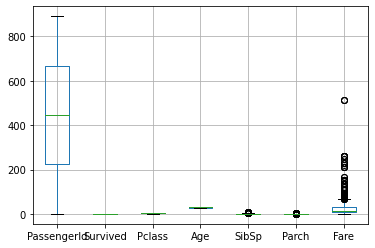

In [9]:
titanic_data.boxplot()

In [0]:
#We see that the Fare column has way too many outliers
#Let us optimise using this some techniques like taking a log fare
titanic_data['Fare']=np.log(titanic_data['Fare']+1.0)

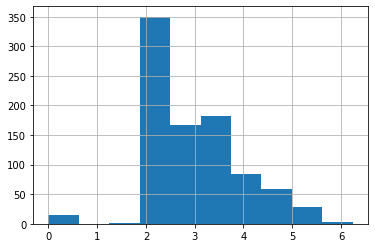

In [11]:
titanic_data['Fare'].hist()

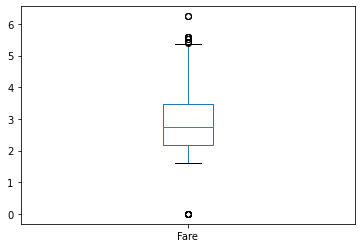

In [12]:
titanic_data.Fare.plot(kind='box') # The Outlier situation has now improved

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
titanic_data.drop(61,inplace=True)

In [15]:
titanic_data.loc[titanic_data.Embarked.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,27.0,0,0,113572,4.394449,NaN


In [0]:
titanic_data.drop(829,inplace=True)

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


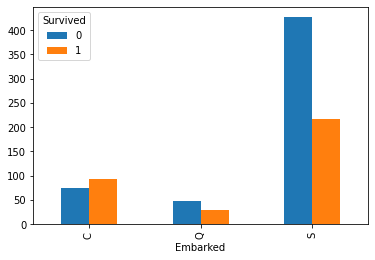

In [18]:
pd.crosstab(titanic_data.Embarked,titanic_data.Survived).plot(kind='bar')#Clearly seeing this we can understand that embarked station has relation with survival rate

In [0]:
#By Common sense we may say that Name will not have any relation with Survival Rate
titanic_data.drop('Name',axis=1,inplace=True)

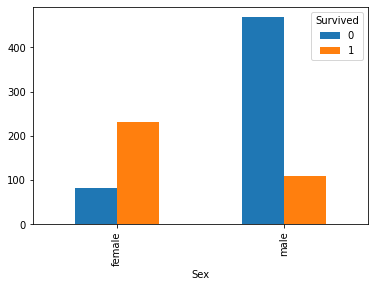

In [20]:
pd.crosstab(titanic_data.Sex,titanic_data.Survived).plot(kind='bar')#Even Sex seems to have some Relation with Survival rate


In [0]:
#Clearly Ticket will not have any effect on the data 
titanic_data.drop('Ticket',axis=1,inplace=True)

In [0]:
titanic_data.drop('PassengerId',axis=1,inplace=True)

In [23]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,29.0,1,0,2.110213,S
1,1,1,female,27.0,1,0,4.280593,C
2,1,3,female,27.0,0,0,2.188856,S
3,1,1,female,27.0,1,0,3.990834,S
4,0,3,male,29.0,0,0,2.202765,S


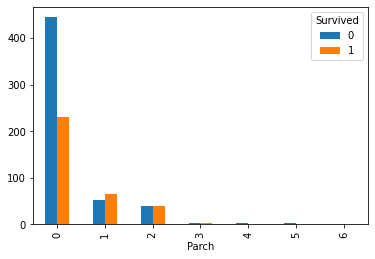

In [24]:
pd.crosstab(titanic_data.Parch,titanic_data.Survived).plot(kind='bar')#This Shows even the Parch Data has some Relation to survival


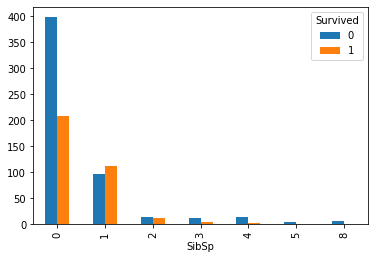

In [25]:
pd.crosstab(titanic_data.SibSp,titanic_data.Survived).plot(kind='bar')#Sibsp also has an effect on survival rate

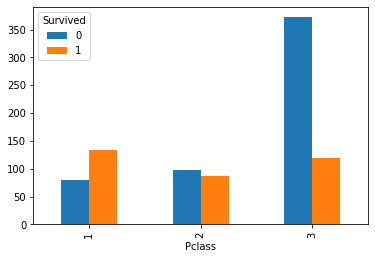

In [26]:
pd.crosstab(titanic_data.Pclass,titanic_data.Survived).plot(kind='bar')#this also has some relation

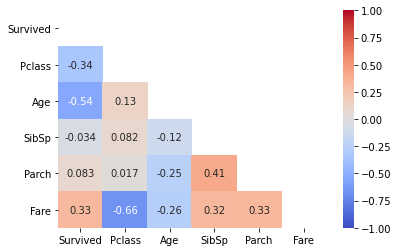

In [27]:
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic_data.corr(),vmin=-1,cmap='coolwarm',mask=mask,annot=True)

In [0]:
titanic_data['Sex'] = np.where(titanic_data.Sex == 'male', 1, 0)

In [0]:
titanic_data=pd.get_dummies(data=titanic_data,columns=['Embarked'])

In [31]:
titanic_data.info()#Finally the Data is Clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_C  889 non-null    uint8  
 8   Embarked_Q  889 non-null    uint8  
 9   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [0]:
X=titanic_data.drop('Survived',axis=1)

In [0]:
y=titanic_data.Survived

In [0]:
SEED=1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)

In [0]:
dt=DecisionTreeClassifier(random_state=SEED)
lr=LogisticRegression(random_state=SEED)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(n_estimators=100,random_state=SEED,max_depth=5,max_features=2)
bg_clf=BaggingClassifier(base_estimator=dt,n_estimators=100,n_jobs=-1,random_state=SEED)
classifiers=[('LogisticRegression',lr),('KNN',knn),('RandomForest',rf),('BaggingClassifier',bg_clf),('DecisionTree',dt)]


In [36]:
import warnings
warnings.filterwarnings("ignore")
for clf_name,clf in classifiers:
   clf.fit(X_train,y_train)
   y_predict=clf.predict(X_test)
   print('{:s}: {:f}'.format(clf_name,accuracy_score(y_test,y_predict)))

LogisticRegression: 0.825843
KNN: 0.825843
RandomForest: 0.842697
BaggingClassifier: 0.848315
DecisionTree: 0.820225


In [37]:
#Now let us use voting Classifier to get better results
vc=VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_predict=vc.predict(X_test)
print('{:.3f}'.format (accuracy_score(y_test,y_predict)))

0.854


In [38]:
#Now we shall use the Boosting Techniques to improve accuracy
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
ad=AdaBoostClassifier(base_estimator=dt,n_estimators=100)
gd=GradientBoostingClassifier(n_estimators=100)
xgb=XGBClassifier(base_estimator=dt,n_estimators=100)
boosters=[('Adaboost',ad),('GradientBoost',gd),('XGBoost',xgb)]
for booster_name,booster in boosters:
   booster.fit(X_train,y_train)
   y_predict=booster.predict(X_test)
   print('{:s}:{:.3f}'.format(booster_name,accuracy_score(y_test,y_predict)))


Adaboost:0.843
GradientBoost:0.831
XGBoost:0.843


In [39]:
#Metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report
#Let us calculate the metrics  for RandomForest BaggingClassifier XGBoost
models=[('RandomForest',rf),('BaggingClassifier',bg_clf),('XGboost',xgb)]
for model_name,model in models:
  print(model_name)
  y_predict=model.predict(X_test)
  print(confusion_matrix(y_test,y_predict))
  print('*'*30)
  print(classification_report(y_test,y_predict))
  print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test,y_predict)))
  print('\n')

RandomForest
[[99  6]
 [22 51]]
******************************
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       105
           1       0.89      0.70      0.78        73

    accuracy                           0.84       178
   macro avg       0.86      0.82      0.83       178
weighted avg       0.85      0.84      0.84       178

ROC_AUC: 0.82


BaggingClassifier
[[96  9]
 [18 55]]
******************************
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.75      0.80        73

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

ROC_AUC: 0.83


XGboost
[[99  6]
 [22 51]]
******************************
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       105
           1    

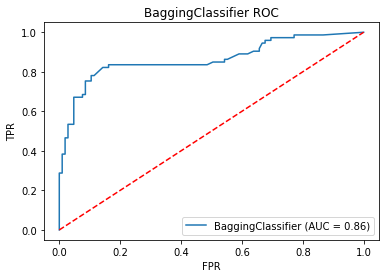

In [40]:
#Plotting ROC curve for BaggingClassifier
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
bg_clf_disp = plot_roc_curve(bg_clf,X_test,y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('BaggingClassifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()
